In [3]:
import requests
import datetime
import time
import pandas as pd

start_time = '15.07.2021 00:00:00'
end_time = '15.08.2021 00:00:00'
pattern = '%d.%m.%Y %H:%M:%S'
july15 = int(time.mktime(time.strptime(start_time, pattern))*1000)
aug15 = int(time.mktime(time.strptime(end_time, pattern))*1000)

from datetime import datetime, timezone

july15 = int(datetime(2021, 7, 15, tzinfo=timezone.utc).timestamp() * 1000)
aug15 = int(datetime(2021, 8, 15, tzinfo=timezone.utc).timestamp() * 1000)


p = {"since":july15,"until":aug15,"size":2500, "screen_name":"NYC_SocialistRA,PhillySRA,SanDiegoSRA,westLA_sra,maine_sra","sort_type":"created_at", "sort":"asc", "filter":'full_text,id,created_at,user.screen_name,user.id'}
response = requests.get('https://tw.pushshift.io/search/tweets', params = p).json()

response['data'][0]

{'created_at': 'Tue Jul 20 01:34:18 +0000 2021',
 'full_text': "It in fact does. Funny how some things just aren't that complicated",
 'id': 1417296777623982080,
 'user': {'screen_name': 'westLA_sra', 'id': 1237154041919983616}}

In [4]:
selected_list = list()
for tweet in response['data']:
    selected_list.append({"created at": tweet['created_at'], 
                          "fulltext": tweet['full_text'], 
                          "tweet id": tweet['id'], 
                          "user id": tweet['user']['id'], 
                          "username": tweet['user']['screen_name']
                         })
    
selected_list[0]

for string in selected_list[0:5]:
    print(string)

{'created at': 'Tue Jul 20 01:34:18 +0000 2021', 'fulltext': "It in fact does. Funny how some things just aren't that complicated", 'tweet id': 1417296777623982080, 'user id': 1237154041919983616, 'username': 'westLA_sra'}
{'created at': 'Tue Jul 20 05:34:24 +0000 2021', 'fulltext': 'Any other job all of these people would be fired immediately', 'tweet id': 1417357200759001090, 'user id': 1129164981394497536, 'username': 'SanDiegoSRA'}
{'created at': 'Tue Jul 20 19:23:29 +0000 2021', 'fulltext': 'A new life awaits you in the off-world colonies!\n\nThe chance to begin again in a golden land of opportunity and adventure!\n\n(Brought to you by the Shimata-Dominguez corporation)', 'tweet id': 1417565844754735107, 'user id': 1129164981394497536, 'username': 'SanDiegoSRA'}
{'created at': 'Tue Jul 20 20:47:50 +0000 2021', 'fulltext': 'Most divorced man to ever leave the earths atmosphere', 'tweet id': 1417587073138282498, 'user id': 1129164981394497536, 'username': 'SanDiegoSRA'}
{'created at

In [5]:
df = pd.DataFrame(selected_list)
df

,created at,fulltext,tweet id,user id,username
0,Tue Jul 20 01:34:18 +0000 2021,It in fact does. Funny how some things just ar...,1417296777623982080,1237154041919983616,westLA_sra
1,Tue Jul 20 05:34:24 +0000 2021,Any other job all of these people would be fir...,1417357200759001090,1129164981394497536,SanDiegoSRA
2,Tue Jul 20 19:23:29 +0000 2021,A new life awaits you in the off-world colonie...,1417565844754735107,1129164981394497536,SanDiegoSRA
3,Tue Jul 20 20:47:50 +0000 2021,Most divorced man to ever leave the earths atm...,1417587073138282498,1129164981394497536,SanDiegoSRA
4,Tue Jul 20 21:24:08 +0000 2021,neat,1417596209103994880,1031710573837344769,NYC_SocialistRA
...,...,...,...,...,...
283,Sat Aug 14 17:29:43 +0000 2021,Sounds like a torture method,1426596911394344960,1129164981394497536,SanDiegoSRA
284,Sat Aug 14 21:53:23 +0000 2021,Narcan training saves lives 💕 Find a class and...,1426663268320432138,1153483528736260101,maine_sra
285,Sat Aug 14 21:59:44 +0000 2021,,1426664865721159680,1153483528736260101,maine_sra
286,Sat Aug 14 22:03:00 +0000 2021,We’ll retweet whatever needs boosting!,1426665686064144384,1153483528736260101,maine_sra


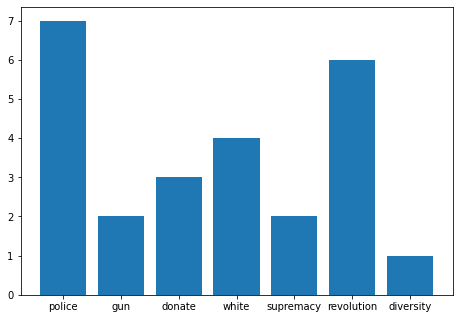

In [35]:
textarray = list()

for x in response['data']:
    textarray.append(x['full_text'])
    
query1 = sum('police' in s for s in textarray)
query2 = sum('gun' in s for s in textarray)
query3 = sum('donate' in s for s in textarray)
query4 = sum('white' in s for s in textarray)
query5 = sum('supremacy' in s for s in textarray)
query6 = sum('revolution' in s for s in textarray)
query7 = sum('diversity' in s for s in textarray)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
queries = ['police', 'gun', 'donate', 'white', 'supremacy', 'revolution', 'diversity']
tally = [query1, query2, query3, query4, query5, query6, query7]
ax.bar(queries, tally)
plt.show()